## Focus on NKT2b cells

In [1]:
# Import useful modules

import numpy as np
import pandas as pd
import scanpy as sc
import os
#import igraph
import matplotlib.pyplot as plt
import seaborn

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=130)

/home/lebrigand/.conda/envs/jupyter/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.3 scipy==1.4.1 pandas==0.25.3 scikit-learn==0.21.3 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1


In [2]:
adata_ann = sc.read_h5ad('./output/wt.ann.h5ad')
adata_raw = sc.read_h5ad('./output/wt.preprocessing.h5ad')
adata_raw.shape

(3290, 12958)

In [3]:
tokeep = adata_ann.obs['cell_type'] == ['NKT2b']
list_of_cell_names = adata_ann.obs_names[tokeep]
adata = adata_raw[list_of_cell_names, ]
adata.obs['cell_type'] = adata_ann.obs['cell_type']
adata.shape

Trying to set attribute `.obs` of view, making a copy.


(405, 12958)

In [4]:
sc.pp.filter_genes(adata, min_cells=3)
adata.X.shape

filtered out 2677 genes that are detectedin less than 3 cells


(405, 10281)

In [5]:
adata.obs

,sample,n_genes,percent_mito,percent_ribo,n_counts,doublet_scores,predicted_doublets,doubletDetection,cell_type
index,,,,,,,,,
AAACCTGCAAACTGCT-1,wt,1532,0.027186,0.472325,2564.0,0.144465,False,0.0,NKT2b
AAAGATGCATATGCTG-1,wt,2640,0.019753,0.453704,5979.0,0.044776,False,0.0,NKT2b
AAAGATGGTGATGTGG-1,wt,2824,0.032559,0.394555,7312.0,0.133333,False,0.0,NKT2b
AACACGTGTACCTACA-1,wt,1794,0.024045,0.343223,3267.0,0.078522,False,0.0,NKT2b
AACCATGGTGCGAAAC-1,wt,1304,0.035088,0.466165,1990.0,0.054222,False,0.0,NKT2b
...,...,...,...,...,...,...,...,...,...
TTTGCGCGTCTTCTCG-1,wt,1983,0.027461,0.385654,3919.0,0.083233,False,0.0,NKT2b
TTTGGTTGTCAATACC-1,wt,2744,0.024450,0.434756,6181.0,0.172113,False,0.0,NKT2b
TTTGTCAAGTGGAGAA-1,wt,1428,0.017414,0.433945,2366.0,0.172113,False,0.0,NKT2b


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


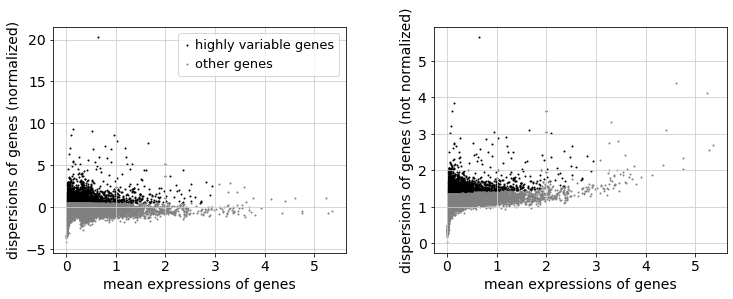

2548

In [6]:
#hvgs = adata_ko.var['highly_variable'].intersection(adata_wt.var['highly_variable'])
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
np.sum(adata.var['highly_variable'])

In [7]:
sc.pp.scale(adata, max_value=10)

In [8]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:00)


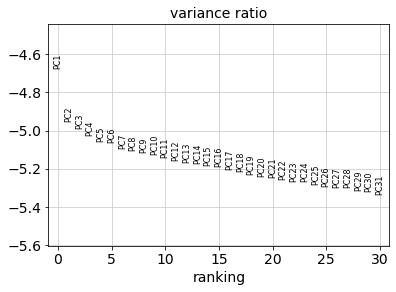

In [9]:
sc.pl.pca_variance_ratio(adata, log=True)

In [10]:
sc.pp.neighbors(adata, n_pcs = 6)

computing neighbors
    using 'X_pca' with n_pcs = 6
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:01)


In [11]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 3 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


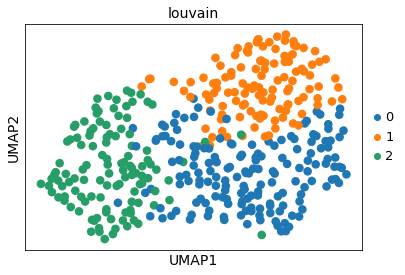

In [12]:
sc.tl.louvain(adata, resolution=0.4)
sc.pl.umap(adata, color=['louvain'])

In [13]:
sc.tl.rank_genes_groups(adata, groupby = 'louvain')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [14]:
cell_type_nb = {}
list_cell_type = adata.obs['louvain'].unique().tolist()
list_cell_type.sort()
for i in range(0, len(adata.obs['louvain'].unique().tolist())):
    cell_type_nb[list_cell_type[i]] = i


clusters = []
genes = []
logFC = []
score = []
pvals = []
pvals_adj = []

for cl in cell_type_nb.keys():
    clusters = clusters + ([cell_type_nb[cl]]*len(adata.uns['rank_genes_groups']['names'][str(cl)]))
    genes = genes + adata.uns['rank_genes_groups']['names'][str(cl)].tolist()
    logFC = logFC + adata.uns['rank_genes_groups']['logfoldchanges'][str(cl)].tolist()
    score = score + adata.uns['rank_genes_groups']['scores'][str(cl)].tolist()
    pvals = pvals + adata.uns['rank_genes_groups']['pvals'][str(cl)].tolist()
    pvals_adj = pvals_adj + adata.uns['rank_genes_groups']['pvals_adj'][str(cl)].tolist()
    
    
markers = pd.DataFrame(data = {'clusters': clusters,
                              'genes':genes,
                              'logFC':logFC,
                              'score':score,
                              'pvals':pvals,
                              'pvals_adj':pvals_adj,
                              })

markers.to_csv(path_or_buf = 'markers.sub.nkt2b.tsv', sep = '\t', index = False)

pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

,0,1,2
0,Ctsd,Gimap6,Rexo2
1,Itgae,Klrb1c,Id3
2,Sh3bgrl3,Ms4a4b,Emb
3,Cd52,Gimap3,S100a6
4,Ctsw,Malat1,Igfbp4
5,AW112010,Nkg7,Tcf7
6,Cd7,Gimap4,Il4
7,Qrfp,Bcl2,Rgcc
8,Cotl1,Gm26740,Gpx1
9,Selplg,Ltb,Mif


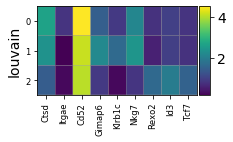

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[2.88, 0, 0.2])

In [15]:
markers_genes = ['Ctsd','Itgae','Cd52','Gimap6','Klrb1c','Nkg7','Rexo2','Id3','Tcf7']
sc.pl.matrixplot(adata, markers_genes, groupby='louvain')

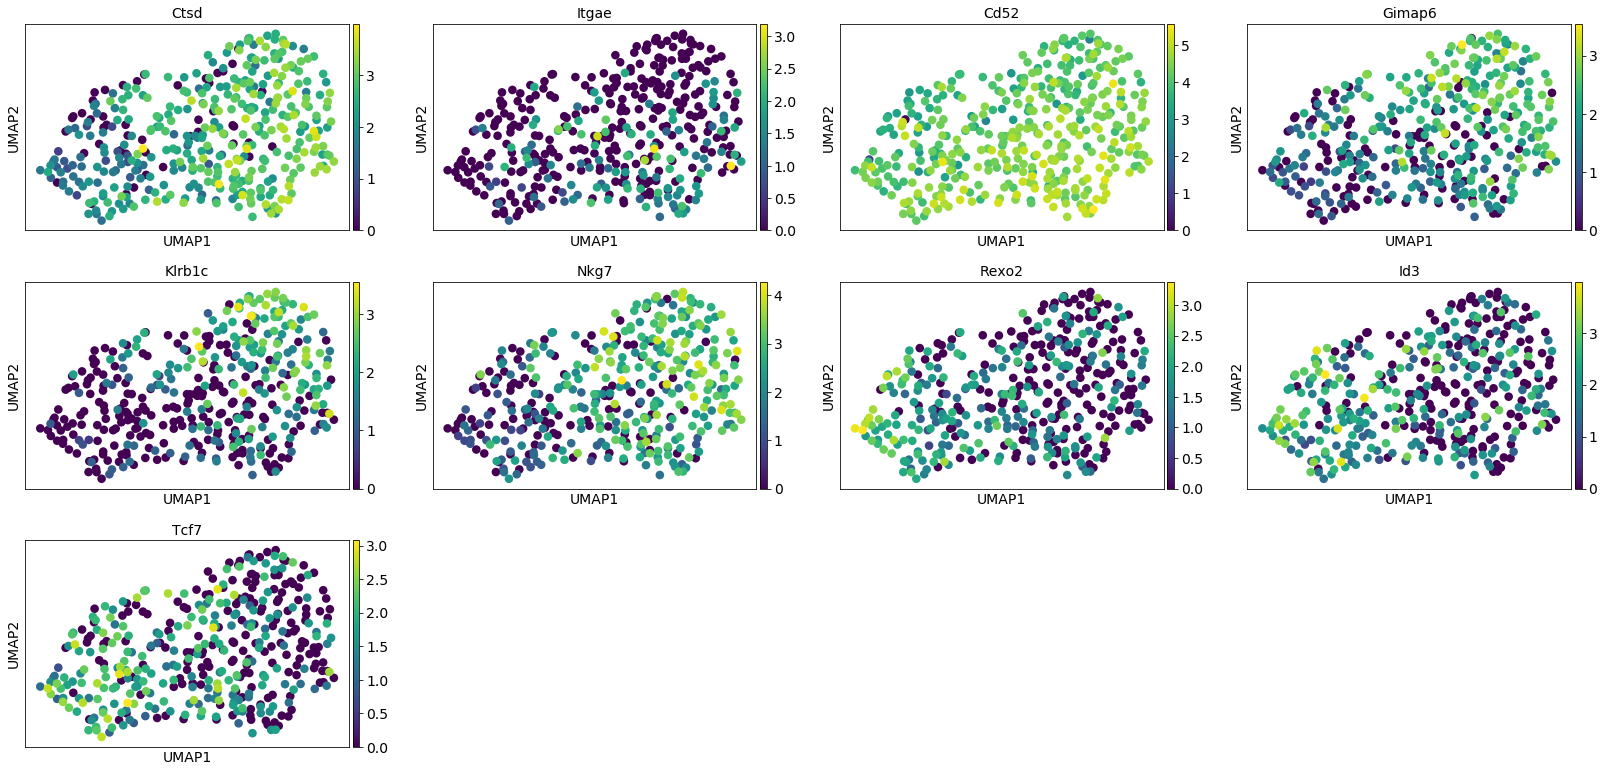

In [16]:
sc.pl.umap(adata, color=markers_genes)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain']`


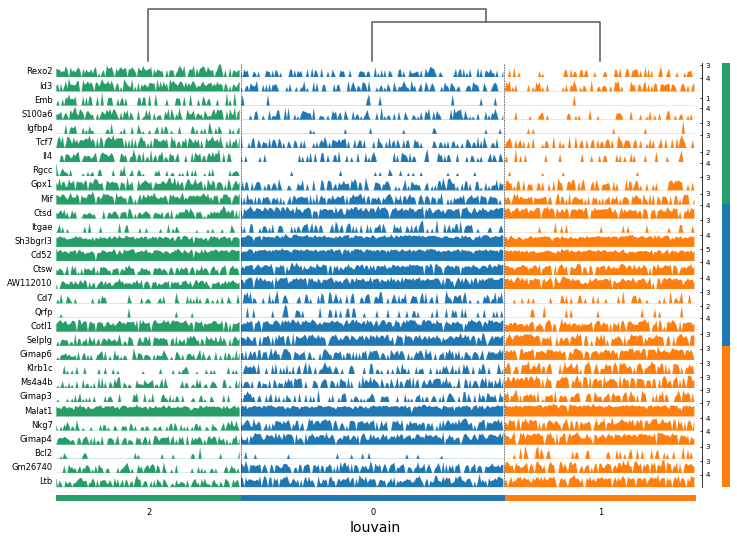

In [17]:
sc.pl.rank_genes_groups_tracksplot(adata, n_genes=10)

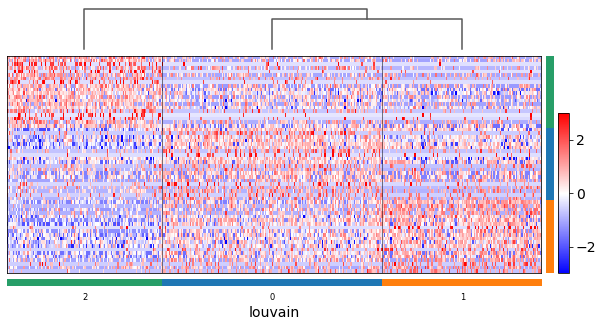

In [18]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=20, key='rank_genes_groups',
                                swap_axes=True, use_raw=False, vmax=3, vmin=-3, cmap='bwr', dendrogram=True)